## importando o pandas

In [50]:
#!pip install pandas
#!pip install matplotlib

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [52]:
df_sp = pd.read_csv('Frota de veículos - São Paulo.csv', sep=';')

display(df_sp.head(1))



,Nível,Indicador,2006,2007,2008,2009,2010,2011,2012,2013,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unidade
0,1,Veículo,15098096.0,16464703.0,17852829.0,19139118.0,20537980.0,21968359.0,23286890.0,24560202.0,...,26605042.0,27332101.0,28138698.0,29057749.0,30058975.0,30778960.0,31455473.0,32293191.0,33264096.0,veículos


## Filtrando o dataframe

In [53]:
# df_sp_formatado = df_sp.drop(columns=['Nível','2006', '2007', '2008','2009','2010','2011','2012', '2013', '2014', '2015','2016','2017','2018','2019', '2020', '2021', '2022','Unidade'])

# display(df_sp_formatado.head(50))

df_sp_formatado = df_sp [['2023', 'Indicador']] 

df_sp_formatado = df_sp_formatado[
                                 (df_sp_formatado['Indicador'].str.contains('Automóvel'))
                                |(df_sp_formatado['Indicador'].str.contains('Motocicleta'))
                                |(df_sp_formatado['Indicador'].str.contains('Ônibus'))
                                |(df_sp_formatado['Indicador']==('Caminhão'))
                                ]


df_sp_formatado

,2023,Indicador
2,20032335.0,Automóvel
4,723325.0,Caminhão
11,5538201.0,Motocicleta
13,173461.0,Ônibus


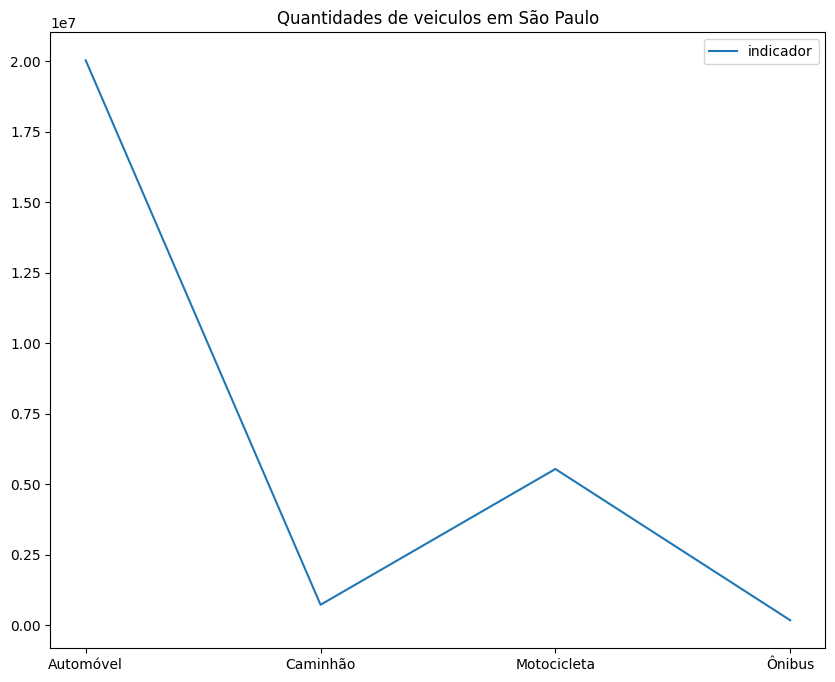

In [54]:
# Crie uma figura com 15 polegadas de largura e 10 polegadas de altura
plt.figure(figsize=(10, 8))


plt.plot(df_sp_formatado['Indicador'], df_sp_formatado['2023'], label='indicador')

# Adicione uma legenda ao criar gráfico no Python
plt.legend()

# Adicione um título ao gráfico
plt.title("Quantidades de veiculos em São Paulo")

# Comando para exibir e criar gráfico no Python
plt.show()

In [55]:
df_dados = pd.read_excel('dados.xlsx',)

display(df_dados)


,descricao,vl_fim_Abril,vl_ini_Maio,vl_fim_Maio
0,Frota de ônibus elétricos em São Paulo,149.00,1.710000e+02,1.790000e+02
1,Meta de ônibus para o fim de 2024,2600.00,2.600000e+03,2.600000e+03
2,Percentual cumprido da meta,5.73,6.570000e+00,6.880000e+00
3,Frota anterior de ônibus elétricos,NaN,1.490000e+02,1.710000e+02
4,Novos ônibus elétricos até junho de 2024,71.00,4.900000e+01,4.100000e+01
5,Número de trólebus operando na cidade,NaN,2.010000e+02,2.010000e+02
6,Meta de troca da frota de ônibus a diesel (%),NaN,2.000000e+01,2.000000e+01
7,Recursos para renovação da frota (PAC),NaN,1.000000e+09,1.000000e+09
8,Quantidade de ônibus a serem contemplados pelo...,NaN,5.000000e+03,5.000000e+03


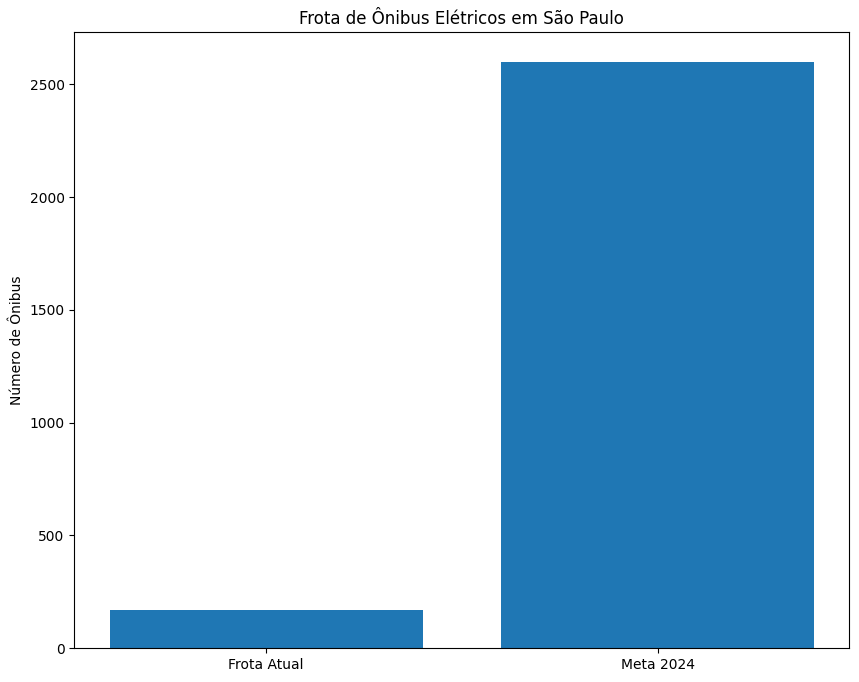

In [56]:
# Gráfico de Barras: Comparação entre frota atual e meta
plt.figure(figsize=(10, 8))
plt.bar(['Frota Atual', 'Meta 2024'], [df_dados['vl_ini_Maio'][0], df_dados['vl_ini_Maio'][1]])
plt.title('Frota de Ônibus Elétricos em São Paulo')
plt.ylabel('Número de Ônibus')
plt.show()


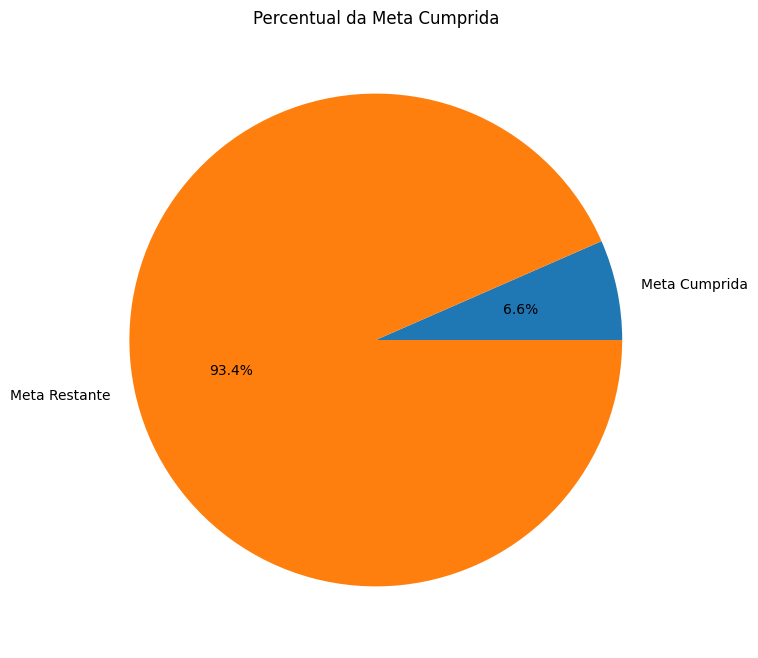

In [57]:
# Gráfico de Pizza: Percentual da meta cumprida
plt.figure(figsize=(10, 8))
plt.pie([df_dados['vl_ini_Maio'][2], 100-df_dados['vl_ini_Maio'][2]], labels=['Meta Cumprida', 'Meta Restante'], autopct='%1.1f%%')
plt.title('Percentual da Meta Cumprida')
plt.show()

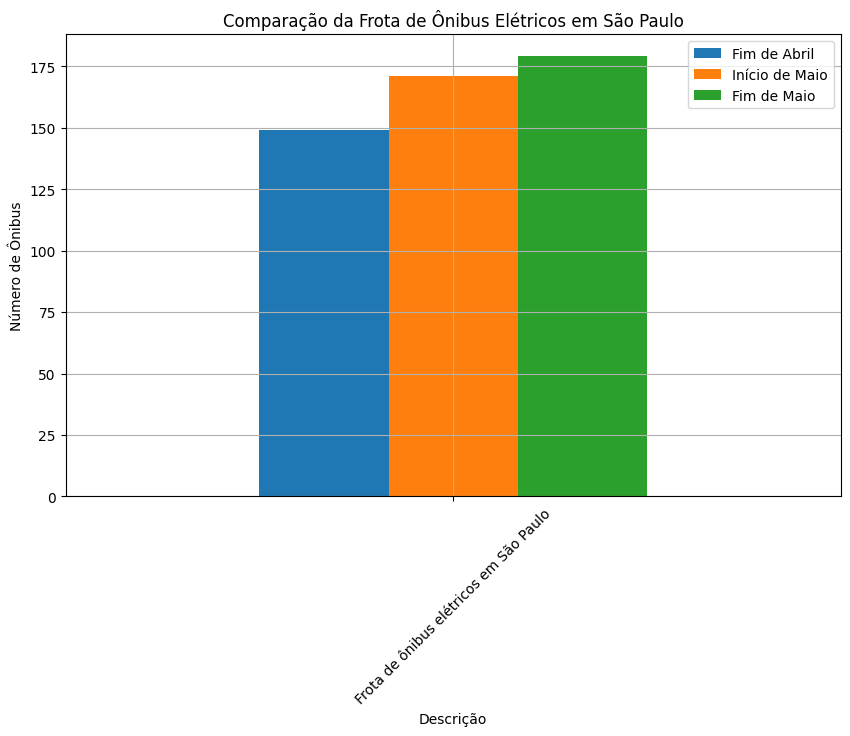

In [58]:
# Criando o gráfico de barras verticais
df_frota.set_index('descricao')[['vl_fim_Abril', 'vl_ini_Maio', 'vl_fim_Maio']].plot(kind='bar', figsize=(10, 6))

# Adicionando título e rótulos
plt.title('Comparação da Frota de Ônibus Elétricos em São Paulo')
plt.xlabel('Descrição')
plt.ylabel('Número de Ônibus')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(['Fim de Abril', 'Início de Maio', 'Fim de Maio'])

# Exibindo o gráfico
plt.show()


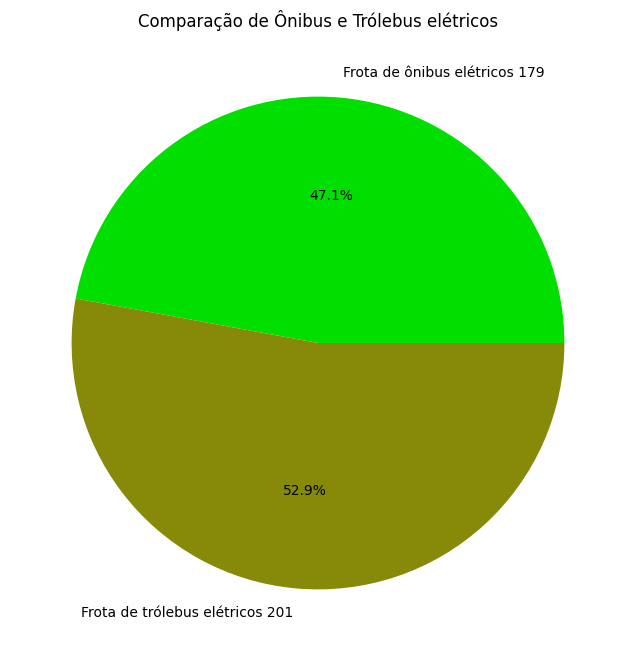

In [59]:
# Criando um DataFrame a partir dos dados (ajuste os valores conforme a sua tabela)
# data = {'Mês': ['Abril', 'Maio', 'Junho'],
#         'Frota Atual': [149, 171, 179],}
# df = pd.DataFrame(data)

df_frota_onibus = df_dados[df_dados["descricao"].str.contains("Frota de ônibus elétricos em São Paulo")]
df_frota_trolebus = df_dados[df_dados["descricao"].str.contains("Número de trólebus operando na cidade")]

# Gráfico de Pizza (Exemplo para o mês de Maio)
plt.figure(figsize=(8, 8))
cores = ['#01DF01', '#868A08']
plt.pie([df_frota_onibus['vl_fim_Maio'][0], df_frota_trolebus['vl_fim_Maio'].values[0]], labels=['Frota de ônibus elétricos 179', 'Frota de trólebus elétricos 201'], autopct='%1.1f%%',colors=cores)
plt.title('Comparação de Ônibus e Trólebus elétricos')
plt.show()

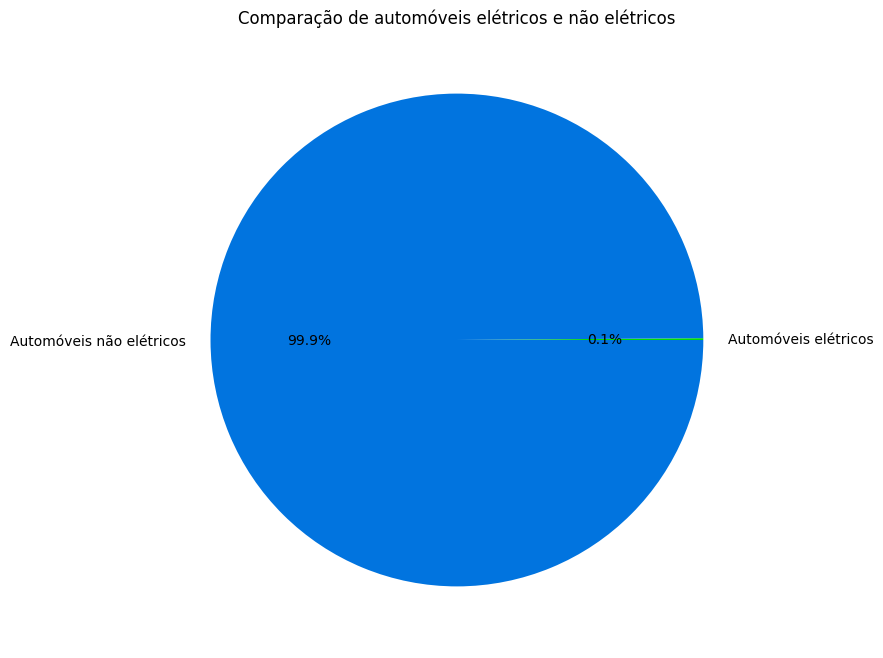

In [60]:
data = {'Automóveis elétricos': [23772.00],
        'Automóveis total': [20032335.00]}

df_automoveis = pd.DataFrame(data)

# Obter os valores para o gráfico
total_automoveis = df_automoveis['Automóveis total'][0]
eletricos_automoveis = df_automoveis['Automóveis elétricos'][0]

# Preparar os dados para o gráfico de pizza
valores = [eletricos_automoveis, total_automoveis - eletricos_automoveis]
labels = ['Automóveis elétricos', 'Automóveis não elétricos']

# Gráfico de Pizza
plt.figure(figsize=(8, 8))
cores = ['#01DF01', '#0174DF']
plt.pie(valores, labels=labels, autopct='%1.1f%%', colors=cores)

plt.title('Comparação de automóveis elétricos e não elétricos')
plt.show()
